In [1]:
import cv2,os
import numpy as np

data_path = r'C:\Users\User\Documents\project\Diagnosis Hard paition\Resize_training_data'
categories = os.listdir(data_path)
labels=np.arange(len(categories))
label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'Resize_Normal_Training': 0, 'Resize_Patient_Training': 1}
['Resize_Normal_Training', 'Resize_Patient_Training']
[0 1]


In [2]:
img_size=224

data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        image_path=os.path.join(folder_path,img_name)
        
        try:
        
            img=cv2.imread(image_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # blur
            blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)

            # divide
            divide = cv2.divide(gray, blur, scale=255)

            # otsu threshold
            thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

            # apply morphology
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
            morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

            resized=cv2.resize(thresh,(img_size,img_size))

            data.append(resized)
            target.append(label_dict[category])
            
            #cv2.imshow("ecg", thresh)
            #cv2.waitKey(500)
            #cv2.destroyAllWindows()
            
        except Exception as e:
            print(image_path,e)
            


In [3]:
import numpy as np

data=np.array(data)
target=np.array(target)

In [4]:
print(data.shape,target.shape)

(741, 224, 224) (741,)


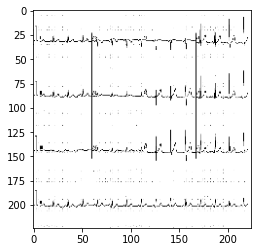

In [5]:
from matplotlib import pyplot as plt

plt.imshow(data[100],cmap='gray')

In [6]:
data_new=data/255.0
data_new=np.reshape(data_new,(data_new.shape[0],img_size,img_size,1))

from keras.utils import np_utils

target_new =np_utils.to_categorical(target)
print(data_new.shape)

(741, 224, 224, 1)


In [7]:
np.save('data',data_new)
np.save('target',target_new)